In [1]:
# Universaidad Nacional Autónoma de México
# Facultad de Ingeniería
# Aprendizaje (Máquina)
# Programa 04
# Algoritmo Genético
# Aguilar Enriquez Paul Sebastian
# Cabrera Lopez Oscar Emilio

In [2]:
import random
from matplotlib import pyplot as plt


In [3]:
# Parametros del algoritmo

## Número de genes: 16
numGenes = 16
## Metodo de selección: Ruleta
## Cruza: De 2 puntos , crossover_rate(pc) = 80%
crossover_points = 2
crossover_rate = .8
## Mutación: -, mutation_rate(pm) = 1%
mutation_rate = .01
## Tamaño de población: 50
population = 50
## Cantidad de generaciones: 20
generations = 20

In [4]:
# Funciones de apoyo

## Verifica la suma de capital a invertir y que este se encuentre en el 
## rango valido
def inversionValida(a, b, c, d):
    inversion = a + b + c + d
    if (inversion > 0) and (inversion <= 10):
        return True
    else:
        return False
    
## Convierte de decimal a binario
def dec2bin(dec):
    bina = []
    
    # Convertimos el valor decimal a binario
    while int(dec/2) != 0:
        bina.append( int(dec%2) )
        dec = dec/2
    if dec > 0:
        bina.append(1)
    
    # Completamos los valores faltantes
    while(len(bina) < 4):
        bina.append(0)
    bina.reverse()
    return bina

## Convierte de binario a decimal
def bin2dec(bina):
    dec = []
    val = 0
    slide = 1
    
    # Recorremos los bits con una ventana de 4
    for i in range(numGenes):
        if bina[i] == 1:
            val += pow(2,(4*slide)-1-i)
        if (i+1)%4 == 0:
            dec.append(val)
            val = 0
            slide += 1
    return dec

In [5]:
#Funcion y valores de mercado

## Valores de mercado
T1 = [0.00, 0.28, 0.45, 0.65, 0.78, 0.90, 1.02, 1.13, 1.23, 1.32, 1.38]
T2 = [0.00, 0.25, 0.41, 0.55, 0.65, 0.75, 0.80, 0.85, 0.88, 0.90, 0.90]
T3 = [0.00, 0.15, 0.25, 0.40, 0.50, 0.62, 0.73, 0.82, 0.90, 0.96, 1.00]
T4 = [0.00, 0.20, 0.33, 0.42, 0.48, 0.53, 0.56, 0.58, 0.60, 0.60, 0.60]

## Función de aptitud
def F(inv1, inv2, inv3, inv4):
    sumInversionTotal = inv1 + inv2 + inv3 + inv4;
    V = abs(sumInversionTotal - 10)
    
    # Ahora sí función de aptitud :D
    x = (T1[inv1] + T2[inv2] + T3[inv3] + T4[inv4]) / ( (500*V)+1 )
    return x

In [6]:
#Inicialización
pobDec = []
pobBin = []

## Generador de población
def generador():
    # Creamos la cantidad de poblacion
    for i in range(population):
        # Limpiamos valores
        a = 0
        b = 0
        c = 0
        d = 0
        
        # Proponemos los valores a invertir de manera aleatoria
        # y verificamos que se encuentren en el rango de 
        # 0 <= inversion <= 10
        while(not inversionValida(a, b, c, d)):
            a = random.randint(0, 11)
            b = random.randint(0, 11 - a)
            c = random.randint(0, 11 - a - b)
            d = random.randint(0, 11 - a - b - c)
        
        # Guardamos al individuo en su formato decimal
        pobDec.append([a, b, c, d])
        # Guardamos al individuo en su formato binario
        pobBin.append(dec2bin(a) + dec2bin(b) + dec2bin(c) + dec2bin(d))

## Imprime la poblacion feliz de nuestro universo :D
def imprimirPoblacion():
    print("\n\n# Poblacion #")
    for i in range(population):
        print("Individuo " , i, ": ", pobDec[i])
        print("Binario ", i, ": ", pobBin[i])

In [7]:
# Evaluación
pobAptitud = []
sumAptitud = 0

def evaluacion():
    global pobAptitud
    pobAptitud = []
    global sumAptitud
    sumAptitud = 0
    
    for i in range(population):
        # Evaluamos con la función de aptitud dada
        pobAptitud.append(F(pobDec[i][0], pobDec[i][1], pobDec[i][2], pobDec[i][3]))
        # Vamos calculando la suma de las aptitudes, se necesitara en la seleccion
        sumAptitud += pobAptitud[i]
    
def imprimirEvaluacion():
    print("\n\n# Aptitud de la población #")
    for i in range(population):
        print("Aptitud ", i, ": ", pobAptitud[i])
    print("Suma de la aptitud: ", sumAptitud)

In [8]:
# Seleccion
promedio = 0
pobPromedio = []
pobVe = []
sumVe = 0
pobAcum = []
pobR = []
pobSelec = []

def seleccion():
    global promedio
    promedio = 0
    global pobPromedio
    global pobVe
    pobVe = []
    global sumVe
    sumVe = 0
    global pobAcum
    pobAcum = []
    global pobR
    pobR = []
    global pobSelec
    pobSelec = []
    
    # calculamos el promedio de las aptitudes
    promedio = sumAptitud / population
    pobPromedio.append(promedio)
    
    # Calculamos los valores esperados para cada individuo
    for i in range(population):
        pobVe.append(pobAptitud[i]/promedio)
        sumVe += pobVe[i];
        pobAcum.append(sumVe)
    
    # Aquí empieza la ruleta!
    for i in range(population):
        # Generamos una r aleatoria
        pobR.append(random.uniform(0,sumVe))
        # Buscamos el primer elementos que es mayor o igual en su acumulado
        # que la r generada
        for j in range(population):
            if pobAcum[j] >= pobR[i]:
                pobSelec.append(j)
                break

def imprimirSeleccion():
    print("\n\n# Calculo de valores para la seleccion de la población #")
    for i in range(population):
        print("Ve ", i, ": ", pobVe[i])
        print("Acumulado ", i, ": ", pobAcum[i])
    print("\nPromedio: ", promedio)
    print("Sum Ve: ", sumVe)
    
    print("\n\n# Seleccion de la población #")
    for i in range(population):
        print("r ", i, ": ", pobR[i])
        print("Ind. seleccionado: ", pobSelec[i])
    
# Es para cargar la población despues de la selección, así podemos
# operar sobre de ella ya con los individuos seleccionados
def configurarPoblacionSeleccionada():
    global pobDec
    global pobBin
    pobDecN = []
    pobBinN = []
    
    for i in range(population):
        pobDecN.append(pobDec[pobSelec[i]])
        pobBinN.append(pobBin[pobSelec[i]])
    
    pobDec = pobDecN
    pobBin = pobBinN

In [9]:
# Cruza
pobK = [] # Valores de K
pobKI = [] # Indices seleccionados para hacer la cruza

def cruza():
    global pobK
    pobK = []
    global ponKI
    pobKI = []
    global pobDec
    global pobBin
    
    # Generamos el valor K para los individuos a cruzar de
    # entre los seleccionados
    for i in range(population):
        pobK.append(random.uniform(0,1))
        
        # Si el valor K generado es menor al pc
        # seleccionamos al individuo para cruzar
        if pobK[i] < crossover_rate:
            pobKI.append(i)
        
    # Ahora procedemos a hacer la cruza
    pobCruzada = [] # Población hija o resultante
    
    # Imprimimos las cruzas seleccionadas ;@
    print("\n\n# Cruza! #")
    for i in range(population):
        print("k ", i, ": ", pobK[i])
    
    print("\nIndividuos a cruzar de los seleccionados: ", pobKI)
    print("\nTotal de individuos a cruzar de los seleccionados: ", len(pobKI))
    
    print("\nProceso de cruza")
    for i in range(len(pobKI)):
        # Va de 1 a 14, excluimos el 0 y el 15 porque son las orillas
        p1 = random.randint(1,15)
        p2 = random.randint(1,15)
        
        # Validamos el orden de los indices en los puntos
        # Si el primer punto es mayor que el segundo, esta mas lejos
        # en el indice de posiciones, hay que intercambiarlos
        if p1 > p2:
            temp = p1
            p1 = p2
            p2 = temp
        
        # Ahora si va la cruza!
        # Tomamos las orillas del primero y el centro del segundo
        print("punto1: ", p1, " punto2: ", p2)
        print("\tPadre1: ", pobBin[pobKI[i]])
        if i < len(pobKI) - 1:
            print("\tPadre2:\t", pobBin[pobKI[i+1]])
            pobCruzada.append(pobBin[pobKI[i]][0:p1] + pobBin[pobKI[i+1]][p1:p2] + pobBin[pobKI[i]][p2:numGenes])
        else:
            print("\tPadre2:\t", pobBin[pobKI[0]])
            pobCruzada.append(pobBin[pobKI[i]][0:p1] + pobBin[pobKI[0]][p1:p2] + pobBin[pobKI[i]][p2:numGenes])
        print("\tHijo:\t", pobCruzada[i])
    
    # Guardamos las combinaciones resultantes en la poblacion
    for i in range(len(pobKI)):
        pobBin[pobKI[i]] = pobCruzada[i]
        pobDec[pobKI[i]] = bin2dec(pobCruzada[i])

In [10]:
# Mutación

def mutacion():
    global pobDec
    global pobBin
    
    # Calculamos el número de mutaciones
    total_gen = numGenes * population
    # Le sumamos 2 para asegurar que por lo menos haya un par
    # de genes a mutar ya que el mutation_rate es muy pequeño
    num_mutation = int(mutation_rate * total_gen) + 2
    
    print("\n\n# Mutacion! #")
    print("Total de mutaciones: ", num_mutation)
    
    # Aqui almacenaremos los indices de los genes a mutar
    mutationIndex = []
    
    # Calculamos los genes a mutar
    for i in range(num_mutation):
        mutationIndex.append(random.randint(0,total_gen-1))
    
    print("Genes a mutar: ", mutationIndex)
    
    # Comenzamos la mutación
    for i in range(num_mutation-1):
        # Calculamos los individuos y el gen de ese individuo
        # a intercambiar
        ind1 = int(mutationIndex[i]/numGenes)
        gen1 = mutationIndex[i]-int(ind1*numGenes)
        ind2 = int(mutationIndex[i+1]/numGenes)
        gen2 = mutationIndex[i+1]-int(ind2*numGenes)
        
        print("Se mutara individuo", ind1, "gen", gen1, " e individuo", ind2, "gen", gen2)
        print("\tAntes de mutar:")
        print("\t\tIndividuo ", ind1, ": ", pobBin[ind1])
        print("\t\tIndividuo ", ind2, ": ", pobBin[ind2])
        
        # Hacemos un swap
        temp = pobBin[ind1][gen1]
        pobBin[ind1][gen1] = pobBin[ind2][gen2]
        pobBin[ind2][gen2] = temp
        
        # Convertimos cada individuo mutado a su versión en decimal
        pobDec[ind1] = bin2dec(pobBin[ind1])
        pobDec[ind2] = bin2dec(pobBin[ind2])
        
        print("\tDespues de mutar:")
        print("\t\tIndividuo ", ind1, ": ", pobBin[ind1])
        print("\t\tIndividuo ", ind2, ": ", pobBin[ind2])
        
        # Damos un paso extra para que realmente el ciclo avance
        # de dos en dos
        i += 1

In [11]:
# Determinamos al mejor individuo para esta generación

mejorInd = 0
mejorApt = 0

def mejorIndividuo():
    global mejorInd
    global mejorApt
    global pobAptitud
    
    pobAptitud = []
    
    for i in range(population):
        pobAptitud.append(F(pobDec[i][0], pobDec[i][1], pobDec[i][2], pobDec[i][3]))
        if pobAptitud[i] > mejorApt:
            mejorApt = pobAptitud[i]
            mejorInd = i

def imprimirMejorIndividuo():
    imprimirEvaluacion()
    print("\n\nEl mejor individuo es el individuo", mejorInd)
    print("\t", pobDec[mejorInd],"\t",pobBin[mejorInd])
            

In [12]:
# Validamos que sigan siendo individuos validos
pobMuertes = []

def validarPoblacion():
    global pobMuertes
    global pobDec
    global pobBin
    
    pobPeor = []
    # Hacemos un ajuste, al cruzar o mutar un individuo este puede terminar
    # con una configuración que invierte más de 10 unidades de millon
    # Si esto sucede el individuo debe morir y ser reemplazado por el
    # mejor individuo ;@
    
    # Para esto primero sustuimos el individuo que ya excedio el limite de 
    # inversión con uno con valores en cero el cual no genera ganacias,
    # es un neutro, despues volvemos a evaluar la poblacion con el individuo
    # nuevo, y sustituimos con el mejor de esta poblacion
    print("\n\n# Validando poblacion tras ser modificada #")
    
    # Buscamos a los individuos que rompen la regla de inversion y los
    # sustituimos por un individuo que corresponda a no realizar inversion
    contadorMuertes = 0
    for i in range(population):
        if pobDec[i][0] + pobDec[i][1] + pobDec[i][2] + pobDec[i][3] > 10:
            pobPeor.append(i)
            print("\tEl individuo ", i, " debe morir, su inversión excede 10 millones: ", pobDec[i])
            pobDec[i] = [0,0,0,0]
            pobBin[i] = dec2bin(int(pobDec[i][0])) + dec2bin(int(pobDec[i][1])) + dec2bin(int(pobDec[i][2])) + dec2bin(int(pobDec[i][3]))
            print("\tEl individuo ", i, " fue sustituido temporalmente por: ", pobDec[i])
            contadorMuertes += 1
    
    # De la población modificada con los temporales buscamos al mejor individuo
    mejorIndividuo()
    
    # Sustituimos a los peores individuos con el mejor
    for i in range(len(pobPeor)):
        pobDec[i] = pobDec[mejorInd]
        pobBin[i] = pobBin[mejorInd]
    
    print("\tLos individuos ", pobPeor, " fueron sustituidos por el individuo ", mejorInd, ": ", pobDec[mejorInd])
    # Llevamos un contador de muertes :P
    pobMuertes.append(contadorMuertes)

In [13]:
def main():
    print("Recordar que los indices para los elementos comienzan en cero!")
    generador()
    imprimirPoblacion()
    for i in range(generations):
        print("\n###-> Generacion ", i, " <-###")
        evaluacion()
        imprimirEvaluacion()
        seleccion()
        imprimirSeleccion()
        configurarPoblacionSeleccionada()
        imprimirPoblacion()
        cruza()
        validarPoblacion()
        imprimirPoblacion()
        mutacion()
        validarPoblacion()
        imprimirPoblacion()
        mejorIndividuo()
        imprimirMejorIndividuo()
    
    plt.plot(pobPromedio, label='Promedio')
    plt.title('Promedio de Aptitud')
    plt.ylabel('Promedio')
    plt.xlabel('Generaciones')
    plt.legend(loc = 'best')
    plt.show()
    
    plt.plot(pobMuertes, label='Sustituciones')
    plt.title('Sustituciones por exceder el limite de inversion')
    plt.ylabel('Sustituciones')
    plt.xlabel('Generaciones (Cruza y mutacion)')
    plt.legend(loc = 'best')
    plt.show()

Recordar que los indices para los elementos comienzan en cero!


# Poblacion #
Individuo  0 :  [9, 1, 0, 0]
Binario  0 :  [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  1 :  [10, 0, 0, 0]
Binario  1 :  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  2 :  [2, 7, 1, 0]
Binario  2 :  [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
Individuo  3 :  [5, 4, 1, 0]
Binario  3 :  [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Individuo  4 :  [8, 1, 0, 1]
Binario  4 :  [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  5 :  [5, 0, 3, 1]
Binario  5 :  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Individuo  6 :  [4, 4, 1, 0]
Binario  6 :  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Individuo  7 :  [1, 0, 0, 7]
Binario  7 :  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Individuo  8 :  [9, 0, 0, 1]
Binario  8 :  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Individuo  9 :  [3, 3, 2, 2]
Binario  9 :  [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]


Aptitud  37 :  1.57
Aptitud  38 :  0.0
Aptitud  39 :  0.0
Aptitud  40 :  1.46
Aptitud  41 :  1.38
Aptitud  42 :  0.0
Aptitud  43 :  1.46
Aptitud  44 :  0.0002599133622125958
Aptitud  45 :  0.0
Aptitud  46 :  0.0029540918163672653
Aptitud  47 :  0.0028542914171656684
Aptitud  48 :  0.0027544910179640716
Aptitud  49 :  0.0
Suma de la aptitud:  39.60538064380044


El mejor individuo es el individuo 10
	 [5, 3, 0, 2] 	 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

###-> Generacion  1  <-###


# Aptitud de la población #
Aptitud  0 :  1.7800000000000002
Aptitud  1 :  1.7800000000000002
Aptitud  2 :  1.7800000000000002
Aptitud  3 :  1.7800000000000002
Aptitud  4 :  1.7800000000000002
Aptitud  5 :  1.7800000000000002
Aptitud  6 :  1.7800000000000002
Aptitud  7 :  1.7800000000000002
Aptitud  8 :  0.0014785214785214785
Aptitud  9 :  1.7800000000000002
Aptitud  10 :  1.7800000000000002
Aptitud  11 :  1.7800000000000002
Aptitud  12 :  0.0014785214785214785
Aptitud  13 :  0.0
Aptitud  14 :  0.

Aptitud  6 :  1.46
Aptitud  7 :  0.0
Aptitud  8 :  0.0014785214785214785
Aptitud  9 :  0.0014785214785214785
Aptitud  10 :  1.46
Aptitud  11 :  1.7800000000000002
Aptitud  12 :  0.0014785214785214785
Aptitud  13 :  0.0014785214785214785
Aptitud  14 :  0.0
Aptitud  15 :  0.0
Aptitud  16 :  0.0014785214785214785
Aptitud  17 :  0.0014785214785214785
Aptitud  18 :  1.57
Aptitud  19 :  1.48
Aptitud  20 :  0.0006146926536731634
Aptitud  21 :  0.0
Aptitud  22 :  0.0005747126436781609
Aptitud  23 :  1.64
Aptitud  24 :  1.33
Aptitud  25 :  1.58
Aptitud  26 :  0.0005747126436781609
Aptitud  27 :  1.33
Aptitud  28 :  0.0005797101449275363
Aptitud  29 :  0.0031337325349301394
Aptitud  30 :  1.56
Aptitud  31 :  0.00028657114295234924
Aptitud  32 :  0.0
Aptitud  33 :  0.0014785214785214785
Aptitud  34 :  1.7800000000000002
Aptitud  35 :  1.7800000000000002
Aptitud  36 :  1.7800000000000002
Aptitud  37 :  0.0
Aptitud  38 :  0.0007861425716189207
Aptitud  39 :  0.0014785214785214785
Aptitud  40 :  0.0

Acumulado  10 :  18.186765335556302
Ve  11 :  0.003383852937356263
Acumulado  11 :  18.19014918849366
Ve  12 :  0.0006141470551035141
Acumulado  12 :  18.190763335548763
Ve  13 :  4.084609070648187
Acumulado  13 :  22.27537240619695
Ve  14 :  0.003383852937356263
Acumulado  14 :  22.27875625913431
Ve  15 :  0.003383852937356263
Acumulado  15 :  22.282140112071666
Ve  16 :  0.0
Acumulado  16 :  22.282140112071666
Ve  17 :  3.3125183316842013
Acumulado  17 :  25.59465844375587
Ve  18 :  4.084609070648187
Acumulado  18 :  29.679267514404057
Ve  19 :  0.002189551900642288
Acumulado  19 :  29.6814570663047
Ve  20 :  0.007357506236988606
Acumulado  20 :  29.688814572541688
Ve  21 :  0.003383852937356263
Acumulado  21 :  29.692198425479045
Ve  22 :  0.003383852937356263
Acumulado  22 :  29.695582278416403
Ve  23 :  3.6362983189916793
Acumulado  23 :  33.33188059740808
Ve  24 :  0.007357506236988606
Acumulado  24 :  33.339238103645066
Ve  25 :  4.084609070648187
Acumulado  25 :  37.42384717429

r  6 :  2.6560853863394285
Ind. seleccionado:  12
r  7 :  37.70812709527415
Ind. seleccionado:  43
r  8 :  27.93206562762468
Ind. seleccionado:  36
r  9 :  6.369612519789655
Ind. seleccionado:  16
r  10 :  30.359913827904805
Ind. seleccionado:  38
r  11 :  19.715180463463224
Ind. seleccionado:  30
r  12 :  29.67737469524484
Ind. seleccionado:  38
r  13 :  13.683311591829062
Ind. seleccionado:  25
r  14 :  47.41356619237704
Ind. seleccionado:  48
r  15 :  8.654206736046012
Ind. seleccionado:  19
r  16 :  30.54631854532221
Ind. seleccionado:  38
r  17 :  24.738759729788907
Ind. seleccionado:  35
r  18 :  32.11600255137349
Ind. seleccionado:  40
r  19 :  18.976634267664135
Ind. seleccionado:  29
r  20 :  41.976942139359586
Ind. seleccionado:  45
r  21 :  18.947929920858208
Ind. seleccionado:  29
r  22 :  48.70180297449438
Ind. seleccionado:  49
r  23 :  33.77908420711575
Ind. seleccionado:  42
r  24 :  45.492096414779844
Ind. seleccionado:  48
r  25 :  13.655456720777604
Ind. seleccionado

Ind. seleccionado:  23
r  15 :  44.67183087295378
Ind. seleccionado:  46
r  16 :  8.18088314527692
Ind. seleccionado:  9
r  17 :  21.318824667877777
Ind. seleccionado:  26
r  18 :  0.21263869365072413
Ind. seleccionado:  0
r  19 :  42.603716677608
Ind. seleccionado:  43
r  20 :  14.836117083880644
Ind. seleccionado:  20
r  21 :  11.26550437332335
Ind. seleccionado:  11
r  22 :  47.69712970445636
Ind. seleccionado:  48
r  23 :  17.005394345012135
Ind. seleccionado:  21
r  24 :  0.5029266860357763
Ind. seleccionado:  0
r  25 :  1.750628676717925
Ind. seleccionado:  1
r  26 :  23.94891826151286
Ind. seleccionado:  29
r  27 :  34.76027628894142
Ind. seleccionado:  37
r  28 :  34.03014763433224
Ind. seleccionado:  37
r  29 :  6.072437084430723
Ind. seleccionado:  6
r  30 :  40.91481282806399
Ind. seleccionado:  41
r  31 :  11.677312975923945
Ind. seleccionado:  17
r  32 :  14.60081344895887
Ind. seleccionado:  18
r  33 :  15.016698666914866
Ind. seleccionado:  20
r  34 :  29.99958753051568


Acumulado  46 :  48.43043471194466
Ve  47 :  1.5675915909770672
Acumulado  47 :  49.99802630292173
Ve  48 :  0.0007514332223042117
Acumulado  48 :  49.998777736144035
Ve  49 :  0.0012222638559310484
Acumulado  49 :  49.999999999999964

Promedio:  1.0461908633854058
Sum Ve:  49.999999999999964


# Seleccion de la población #
r  0 :  12.89380926670375
Ind. seleccionado:  8
r  1 :  49.59947798990839
Ind. seleccionado:  47
r  2 :  42.677131993523766
Ind. seleccionado:  39
r  3 :  39.60815597877762
Ind. seleccionado:  37
r  4 :  30.328681978480155
Ind. seleccionado:  25
r  5 :  28.57897919643545
Ind. seleccionado:  22
r  6 :  11.409039229454867
Ind. seleccionado:  7
r  7 :  47.251594341717784
Ind. seleccionado:  43
r  8 :  42.91855625385739
Ind. seleccionado:  39
r  9 :  14.548445251551074
Ind. seleccionado:  9
r  10 :  21.878828576653298
Ind. seleccionado:  14
r  11 :  12.86263845212833
Ind. seleccionado:  8
r  12 :  44.451669874750614
Ind. seleccionado:  40
r  13 :  4.806333142305737
Ind.

Individuo  10 :  [8, 2, 0, 0]
Binario  10 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  11 :  [8, 2, 0, 0]
Binario  11 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  12 :  [8, 2, 0, 0]
Binario  12 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  13 :  [8, 2, 0, 0]
Binario  13 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  14 :  [8, 2, 0, 0]
Binario  14 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  15 :  [8, 2, 0, 0]
Binario  15 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  16 :  [8, 2, 0, 0]
Binario  16 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  17 :  [8, 2, 0, 0]
Binario  17 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  18 :  [8, 2, 0, 0]
Binario  18 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  19 :  [8, 2, 0, 0]
Binario  19 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  20 :  [8, 2, 0, 0]
Binario  20 :  [1, 0, 0, 0, 0,

Individuo  45 :  [8, 2, 0, 0]
Binario  45 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  46 :  [1, 5, 2, 2]
Binario  46 :  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
Individuo  47 :  [8, 2, 0, 0]
Binario  47 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  48 :  [8, 2, 0, 0]
Binario  48 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  49 :  [8, 2, 0, 0]
Binario  49 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Cruza! #
k  0 :  0.9790121147858939
k  1 :  0.9826112056393927
k  2 :  0.7162883361730427
k  3 :  0.902204877329867
k  4 :  0.016047372384981773
k  5 :  0.2726347713515761
k  6 :  0.549466446422353
k  7 :  0.9352909802247614
k  8 :  0.912576433606077
k  9 :  0.8624041664318364
k  10 :  0.9242659506348354
k  11 :  0.5938123289000333
k  12 :  0.29258391112534543
k  13 :  0.601645771337486
k  14 :  0.24706788743992225
k  15 :  0.25479019022913807
k  16 :  0.35519684358693127
k  17 :  0.36495702377672834
k  18 :  0.822815648

punto1:  8  punto2:  11
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  9  punto2:  9
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  8  punto2:  8
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  10  punto2:  13
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  7  punto2:  9
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:

Individuo  12 :  [8, 2, 0, 0]
Binario  12 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  13 :  [8, 2, 0, 0]
Binario  13 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  14 :  [8, 2, 0, 0]
Binario  14 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  15 :  [8, 2, 0, 0]
Binario  15 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  16 :  [8, 2, 0, 0]
Binario  16 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  17 :  [8, 2, 0, 0]
Binario  17 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  18 :  [8, 2, 0, 0]
Binario  18 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  19 :  [8, 2, 0, 0]
Binario  19 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  20 :  [8, 2, 0, 0]
Binario  20 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  21 :  [8, 2, 0, 0]
Binario  21 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  22 :  [8, 2, 0, 0]
Binario  22 :  [1, 0, 0, 0, 0,

		Individuo  1 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mutar:
		Individuo  44 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  1 :  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Se mutara individuo 1 gen 6  e individuo 28 gen 2
	Antes de mutar:
		Individuo  1 :  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  28 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mutar:
		Individuo  1 :  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  28 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Se mutara individuo 28 gen 2  e individuo 8 gen 10
	Antes de mutar:
		Individuo  28 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  8 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Despues de mutar:
		Individuo  28 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		Individuo  8 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Validando poblacion tras ser modificada #
	El individuo  4  de

Aptitud  37 :  0.0
Aptitud  38 :  1.64
Aptitud  39 :  1.64
Aptitud  40 :  1.64
Aptitud  41 :  1.64
Aptitud  42 :  1.64
Aptitud  43 :  1.64
Aptitud  44 :  1.64
Aptitud  45 :  1.64
Aptitud  46 :  1.64
Aptitud  47 :  1.64
Aptitud  48 :  1.64
Aptitud  49 :  1.64
Suma de la aptitud:  77.0812287712288


El mejor individuo es el individuo 10
	 [8, 2, 0, 0] 	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

###-> Generacion  13  <-###


# Aptitud de la población #
Aptitud  0 :  1.64
Aptitud  1 :  1.64
Aptitud  2 :  1.64
Aptitud  3 :  1.64
Aptitud  4 :  1.64
Aptitud  5 :  1.64
Aptitud  6 :  1.64
Aptitud  7 :  1.64
Aptitud  8 :  1.64
Aptitud  9 :  1.64
Aptitud  10 :  1.64
Aptitud  11 :  1.64
Aptitud  12 :  1.64
Aptitud  13 :  1.64
Aptitud  14 :  1.64
Aptitud  15 :  0.0012287712287712288
Aptitud  16 :  1.64
Aptitud  17 :  1.64
Aptitud  18 :  1.64
Aptitud  19 :  1.64
Aptitud  20 :  1.64
Aptitud  21 :  1.64
Aptitud  22 :  1.64
Aptitud  23 :  1.64
Aptitud  24 :  1.64
Aptitud  25 :  1.64
Aptitud  26

Acumulado  2 :  2.999999999999999
Ve  3 :  0.9999999999999998
Acumulado  3 :  3.999999999999999
Ve  4 :  0.9999999999999998
Acumulado  4 :  4.999999999999999
Ve  5 :  0.9999999999999998
Acumulado  5 :  5.999999999999999
Ve  6 :  0.9999999999999998
Acumulado  6 :  6.999999999999999
Ve  7 :  0.9999999999999998
Acumulado  7 :  7.999999999999999
Ve  8 :  0.9999999999999998
Acumulado  8 :  8.999999999999998
Ve  9 :  0.9999999999999998
Acumulado  9 :  9.999999999999998
Ve  10 :  0.9999999999999998
Acumulado  10 :  10.999999999999998
Ve  11 :  0.9999999999999998
Acumulado  11 :  11.999999999999998
Ve  12 :  0.9999999999999998
Acumulado  12 :  12.999999999999998
Ve  13 :  0.9999999999999998
Acumulado  13 :  13.999999999999998
Ve  14 :  0.9999999999999998
Acumulado  14 :  14.999999999999998
Ve  15 :  0.9999999999999998
Acumulado  15 :  15.999999999999998
Ve  16 :  0.9999999999999998
Acumulado  16 :  16.999999999999996
Ve  17 :  0.9999999999999998
Acumulado  17 :  17.999999999999996
Ve  18 :  0.

Acumulado  19 :  19.791705990551854
Ve  20 :  1.0416653106706255
Acumulado  20 :  20.83337130122248
Ve  21 :  1.0416653106706255
Acumulado  21 :  21.87503661189311
Ve  22 :  1.0416653106706255
Acumulado  22 :  22.916701922563735
Ve  23 :  1.0416653106706255
Acumulado  23 :  23.958367233234362
Ve  24 :  1.0416653106706255
Acumulado  24 :  25.00003254390499
Ve  25 :  1.0416653106706255
Acumulado  25 :  26.041697854575617
Ve  26 :  1.0416653106706255
Acumulado  26 :  27.083363165246244
Ve  27 :  1.0416653106706255
Acumulado  27 :  28.12502847591687
Ve  28 :  1.0416653106706255
Acumulado  28 :  29.166693786587498
Ve  29 :  1.0416653106706255
Acumulado  29 :  30.208359097258125
Ve  30 :  1.0416653106706255
Acumulado  30 :  31.250024407928752
Ve  31 :  1.0416653106706255
Acumulado  31 :  32.29168971859938
Ve  32 :  1.0416653106706255
Acumulado  32 :  33.33335502927
Ve  33 :  1.0416653106706255
Acumulado  33 :  34.375020339940626
Ve  34 :  1.0416653106706255
Acumulado  34 :  35.41668565061125

r  32 :  6.060043950836224
Ind. seleccionado:  6
r  33 :  31.866969385378848
Ind. seleccionado:  31
r  34 :  0.13670746417940857
Ind. seleccionado:  0
r  35 :  43.27630505048352
Ind. seleccionado:  43
r  36 :  24.02543689545586
Ind. seleccionado:  24
r  37 :  46.08211728342027
Ind. seleccionado:  46
r  38 :  24.054313417827302
Ind. seleccionado:  24
r  39 :  45.66495055410211
Ind. seleccionado:  45
r  40 :  20.442978414444614
Ind. seleccionado:  20
r  41 :  49.692950827752036
Ind. seleccionado:  49
r  42 :  5.468491305425365
Ind. seleccionado:  5
r  43 :  19.77426116144601
Ind. seleccionado:  19
r  44 :  29.916737402239274
Ind. seleccionado:  29
r  45 :  34.67268441282166
Ind. seleccionado:  34
r  46 :  2.546208497172297
Ind. seleccionado:  2
r  47 :  41.919316455320185
Ind. seleccionado:  41
r  48 :  32.51253543424532
Ind. seleccionado:  32
r  49 :  48.71170032457767
Ind. seleccionado:  48


# Poblacion #
Individuo  0 :  [8, 2, 0, 0]
Binario  0 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

k  12 :  0.038497006267934286
k  13 :  0.5663377193619176
k  14 :  0.5295080369625677
k  15 :  0.4352037983490322
k  16 :  0.7499210294805511
k  17 :  0.6804596755106772
k  18 :  0.9114859775178157
k  19 :  0.34310719833528014
k  20 :  0.2717530570306158
k  21 :  0.9992281658708949
k  22 :  0.898875622354365
k  23 :  0.13742351583377854
k  24 :  0.9255032448079487
k  25 :  0.45312435085829084
k  26 :  0.34170164925504287
k  27 :  0.3376768953502304
k  28 :  0.640386902428167
k  29 :  0.2852569739592806
k  30 :  0.3888229240238039
k  31 :  0.7965492584614413
k  32 :  0.1721576780724735
k  33 :  0.47262102050001287
k  34 :  0.8614960939113283
k  35 :  0.25197428651445974
k  36 :  0.7020582636200798
k  37 :  0.6750914559268058
k  38 :  0.9129812732338146
k  39 :  0.38531421089942397
k  40 :  0.966272774019076
k  41 :  0.9704856900305204
k  42 :  0.42598992819733295
k  43 :  0.759087369565276
k  44 :  0.8470987017232564
k  45 :  0.9152596810037447
k  46 :  0.5915468431324412
k  47 :  0.132

	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  5  punto2:  12
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  5  punto2:  9
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  3  punto2:  11
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  4  punto2:  12
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre2:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Hijo:	 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
punto1:  7  punto2:  10
	Padre1:  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Padre

Individuo  12 :  [8, 2, 0, 0]
Binario  12 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  13 :  [8, 2, 0, 0]
Binario  13 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  14 :  [8, 2, 0, 0]
Binario  14 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  15 :  [8, 2, 0, 0]
Binario  15 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  16 :  [8, 2, 0, 0]
Binario  16 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  17 :  [8, 2, 0, 0]
Binario  17 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  18 :  [8, 2, 0, 0]
Binario  18 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  19 :  [8, 2, 0, 0]
Binario  19 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  20 :  [8, 2, 0, 0]
Binario  20 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  21 :  [8, 2, 0, 0]
Binario  21 :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo  22 :  [8, 2, 0, 0]
Binario  22 :  [1, 0, 0, 0, 0,

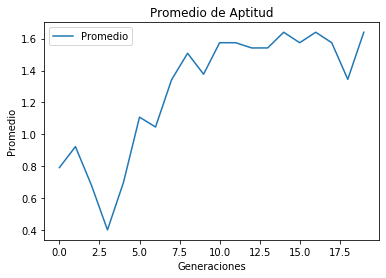

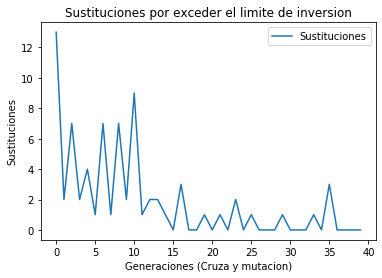

In [14]:
main()